# Ford Go Bike System Data - Data Visualization

## Loading libraries and dataset

In [4]:
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [5]:
folder_name_of_csvs = 'all_csv_files'

In [6]:
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs)

In [7]:
df.to_csv('data.csv')

In [49]:
df = pd.read_csv('data.csv')

## Exploring the dataset 

In [50]:
df.head(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN,NaN
1,1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN,NaN
2,2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   duration_sec             int64  
 2   start_time               object 
 3   end_time                 object 
 4   start_station_id         float64
 5   start_station_name       object 
 6   start_station_latitude   float64
 7   start_station_longitude  float64
 8   end_station_id           float64
 9   end_station_name         object 
 10  end_station_latitude     float64
 11  end_station_longitude    float64
 12  bike_id                  int64  
 13  user_type                object 
 14  member_birth_year        float64
 15  member_gender            object 
 16  bike_share_for_all_trip  object 
dtypes: float64(7), int64(3), object(7)
memory usage: 309.1+ MB


In [52]:
df['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

In [53]:
df['user_type'] = df['user_type'].astype('category')

In [54]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [55]:
df['start_time'].head()

0   2017-12-31 16:57:39.654
1   2017-12-31 15:56:34.842
2   2017-12-31 22:45:48.411
3   2017-12-31 17:31:10.636
4   2017-12-31 14:23:14.001
Name: start_time, dtype: datetime64[ns]

In [56]:
df['start_time_month']=pd.DatetimeIndex(df['start_time']).month

In [57]:
df.head(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN,NaN,12
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN,NaN,12
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN,12
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN,12
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN,NaN,12
5,5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.1660,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,NaN,12
6,6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.6190,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,NaN,NaN,NaN,12
7,7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.2110,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN,NaN,12
8,8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.3080,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN,NaN,12
9,9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.0530,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN,NaN,12


In [58]:
df.sample(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month
2239041,121118,244,2018-11-02 18:15:47.731,2018-11-02 18:19:52.1720,163.0,Lake Merritt BART Station,37.797320,-122.265320,202.0,Washington St at 8th St,37.800754,-122.274894,1550,Subscriber,NaN,NaN,No,11
1800543,70295,283,2018-09-19 19:54:08.456,2018-09-19 19:58:51.6510,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,244.0,Shattuck Ave at Hearst Ave,37.873748,-122.268648,1117,Subscriber,1995.0,Female,No,9
334341,334341,225,2017-09-18 18:22:11.045,2017-09-18 18:25:56.4270,24.0,Spear St at Folsom St,37.789677,-122.390428,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,383,Subscriber,NaN,NaN,NaN,9
728032,6812,916,2018-03-30 08:25:30.808,2018-03-30 08:40:47.1300,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,1118,Subscriber,1994.0,Male,No,3
918369,85767,392,2018-04-12 09:01:58.024,2018-04-12 09:08:30.0790,196.0,Grand Ave at Perkins St,37.808894,-122.256460,337.0,Webster St at 19th St,37.806970,-122.266588,1030,Subscriber,1988.0,Male,No,4
753947,32727,266,2018-03-23 23:30:52.459,2018-03-23 23:35:18.6870,72.0,Page St at Scott St,37.772406,-122.435650,95.0,Sanchez St at 15th St,37.766219,-122.431060,458,Customer,1986.0,Male,No,3
622985,8483,701,2018-02-27 07:28:51.483,2018-02-27 07:40:33.1820,295.0,William St at 10th St,37.332794,-121.875926,312.0,San Jose Diridon Station,37.329732,-121.901782,2825,Subscriber,1993.0,Male,No,2
395446,395446,376,2017-08-30 12:27:14.613,2017-08-30 12:33:31.5790,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,184.0,Franklin St at 14th St,37.803765,-122.269988,2874,Subscriber,NaN,NaN,NaN,8
1494799,155935,940,2018-07-09 07:46:39.601,2018-07-09 08:02:20.4410,72.0,Page St at Scott St,37.772406,-122.435650,350.0,8th St at Brannan St,37.771431,-122.405787,2196,Subscriber,1989.0,Male,No,7
123249,123249,423,2017-11-17 19:35:35.152,2017-11-17 19:42:38.7470,121.0,Mission Playground,37.759210,-122.421339,105.0,16th St at Prosper St,37.764285,-122.431804,2342,Subscriber,NaN,NaN,NaN,11


In [59]:
df['start_time_month'].value_counts()

10    310395
9     284775
8     275454
7     243295
11    229747
12    217902
6     198657
5     179125
4     131169
3     111382
2     106718
1      94802
Name: start_time_month, dtype: int64

In [60]:
df['start_month_char'] = df['start_time_month'].apply(lambda x: calendar.month_abbr[x])

In [61]:
df['start_month_char'].value_counts()

Oct    310395
Sep    284775
Aug    275454
Jul    243295
Nov    229747
Dec    217902
Jun    198657
May    179125
Apr    131169
Mar    111382
Feb    106718
Jan     94802
Name: start_month_char, dtype: int64

In [62]:
df['start_time_hour']=pd.DatetimeIndex(df['start_time']).hour

In [63]:
df.sample(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_month_char,start_time_hour
1460433,121569,680,2018-07-13 12:52:35.176,2018-07-13 13:03:55.2280,312.0,San Jose Diridon Station,37.329732,-121.901782,305.0,Ryland Park,37.342725,-121.895617,333,Subscriber,1990.0,Male,No,7,Jul,12
1783356,53108,392,2018-09-22 12:34:12.836,2018-09-22 12:40:45.2850,201.0,10th St at Fallon St,37.797673,-122.262997,372.0,Madison St at 17th St,37.804037,-122.262409,1996,Subscriber,1988.0,Female,No,9,Sep,12
2183922,65999,347,2018-11-13 07:07:24.340,2018-11-13 07:13:12.0270,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,2766,Subscriber,NaN,NaN,No,11,Nov,7
2207756,89833,251,2018-11-07 21:54:29.554,2018-11-07 21:58:40.7900,89.0,Division St at Potrero Ave,37.769218,-122.407646,87.0,Folsom St at 13th St,37.769757,-122.415674,2740,Subscriber,NaN,NaN,No,11,Nov,21
1235077,92181,1050,2018-06-17 14:56:01.208,2018-06-17 15:13:32.0560,356.0,Valencia St at Clinton Park,37.769188,-122.422285,71.0,Broderick St at Oak St,37.773063,-122.439078,1660,Subscriber,1989.0,Male,No,6,Jun,14
456283,456283,124,2017-08-08 09:08:01.040,2017-08-08 09:10:06.0150,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,22.0,Howard St at Beale St,37.789756,-122.394643,2201,Subscriber,NaN,NaN,NaN,8,Aug,9
1877240,146992,1916,2018-09-07 21:05:33.027,2018-09-07 21:37:29.6860,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,347.0,23rd St and San Bruno Ave,37.754436,-122.404364,3148,Customer,1985.0,Male,No,9,Sep,21
2276725,24667,532,2018-12-22 13:45:09.778,2018-12-22 13:54:02.3370,259.0,Addison St at Fourth St,37.866249,-122.299371,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,489,Subscriber,NaN,NaN,No,12,Dec,13
39709,39709,973,2017-12-14 08:34:57.394,2017-12-14 08:51:10.6090,265.0,Ninth St at Parker St,37.858868,-122.291209,250.0,North Berkeley BART Station,37.874014,-122.283019,1631,Subscriber,NaN,NaN,NaN,12,Dec,8
1181133,38237,787,2018-06-25 17:37:08.870,2018-06-25 17:50:16.8390,100.0,Bryant St at 15th St,37.767100,-122.410662,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1596,Subscriber,1992.0,Male,No,6,Jun,17


In [64]:
df['period_of_day']='morning'
df['period_of_day'][(df['start_time_hour'] >= 12) & (df['start_time_hour'] <= 17)] = 'afternoon'
df['period_of_day'][(df['start_time_hour'] >= 18) & (df['start_time_hour'] <= 23)] = 'night'

In [65]:
df.sample(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_month_char,start_time_hour,period_of_day
1738661,8413,1043,2018-09-29 08:08:10.712,2018-09-29 08:25:34.0070,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,285.0,Webster St at O'Farrell St,...,-122.431158,2175,Customer,1984.0,Male,No,9,Sep,8,morning
2070765,154300,431,2018-10-08 08:43:24.103,2018-10-08 08:50:35.5240,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,90.0,Townsend St at 7th St,...,-122.402717,168,Subscriber,NaN,NaN,No,10,Oct,8,morning
413285,413285,617,2017-08-24 08:41:00.738,2017-08-24 08:51:17.8460,77.0,11th St at Natoma St,37.773507,-122.416040,67.0,San Francisco Caltrain Station 2 (Townsend St...,...,-122.395526,799,Customer,NaN,NaN,NaN,8,Aug,8,morning
204629,204629,516,2017-10-25 17:24:52.531,2017-10-25 17:33:28.7390,163.0,Lake Merritt BART Station,37.797320,-122.265320,197.0,El Embarcadero at Grand Ave,...,-122.249680,1242,Subscriber,NaN,NaN,NaN,10,Oct,17,afternoon
497544,497544,560,2017-07-18 17:06:20.187,2017-07-18 17:15:40.6680,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,...,-122.394203,386,Subscriber,NaN,NaN,NaN,7,Jul,17,afternoon
1638405,100319,899,2018-08-15 17:09:03.627,2018-08-15 17:24:02.9260,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,...,-122.417385,69,Subscriber,1992.0,Male,No,8,Aug,17,afternoon
1028116,64345,255,2018-05-20 20:04:28.906,2018-05-20 20:08:44.5430,116.0,Mississippi St at 17th St,37.764802,-122.394771,130.0,22nd St Caltrain Station,...,-122.392057,3165,Subscriber,1988.0,Male,No,5,May,20,night
462119,462119,282,2017-08-05 14:51:22.818,2017-08-05 14:56:05.6200,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,16.0,Steuart St at Market St,...,-122.394430,2322,Customer,NaN,NaN,NaN,8,Aug,14,afternoon
2034792,118327,856,2018-10-13 09:26:16.006,2018-10-13 09:40:32.4630,177.0,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,232.0,MLK Jr Way at 14th St,...,-122.276040,547,Subscriber,NaN,NaN,No,10,Oct,9,morning
1602430,64344,241,2018-08-21 18:05:41.942,2018-08-21 18:09:43.4910,201.0,10th St at Fallon St,37.797673,-122.262997,233.0,E 12th St at 4th Ave,...,-122.255555,3234,Subscriber,1984.0,Female,No,8,Aug,18,night


In [66]:
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)

In [67]:
df['age'] = df['member_birth_year'].apply(lambda x: 2018 - x)

In [68]:
df.sample(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_month_char,start_time_hour,period_of_day,start_weekday_num,start_weekday_char,age
2074101,157636,777,2018-10-07 15:10:05.662,2018-10-07 15:23:02.8610,364.0,Mission Rock St at 3rd St,37.772886,-122.389940,24.0,Spear St at Folsom St,...,NaN,NaN,No,10,Oct,15,afternoon,6,Sun,NaN
61350,61350,430,2017-12-07 22:33:20.145,2017-12-07 22:40:30.8830,211.0,Broadway at 40th St,37.827757,-122.256716,195.0,Bay Pl at Vernon St,...,NaN,NaN,NaN,12,Dec,22,night,3,Thu,NaN
2242393,124470,303,2018-11-02 09:54:36.236,2018-11-02 09:59:39.7070,108.0,16th St Mission BART,37.764710,-122.419957,123.0,Folsom St at 19th St,...,NaN,NaN,No,11,Nov,9,morning,4,Fri,NaN
459836,459836,1993,2017-08-06 18:13:53.196,2017-08-06 18:47:06.9580,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,227.0,Foothill Blvd at Fruitvale Ave,...,NaN,NaN,NaN,8,Aug,18,night,6,Sun,NaN
1803112,72864,350,2018-09-19 16:22:37.359,2018-09-19 16:28:27.5690,75.0,Market St at Franklin St,37.773793,-122.421239,43.0,San Francisco Public Library (Grove St at Hyde...,...,1987.0,Female,No,9,Sep,16,afternoon,2,Wed,31.0
122809,122809,120,2017-11-18 07:42:23.828,2017-11-18 07:44:24.6110,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,4.0,Cyril Magnin St at Ellis St,...,NaN,NaN,NaN,11,Nov,7,morning,5,Sat,NaN
1709808,171722,3820,2018-08-03 18:36:23.957,2018-08-03 19:40:04.3290,200.0,2nd Ave at E 18th St,37.800214,-122.253810,203.0,Webster St at 2nd St,...,NaN,NaN,No,8,Aug,18,night,4,Fri,NaN
2050723,134258,639,2018-10-10 19:12:38.578,2018-10-10 19:23:18.4500,109.0,17th St at Valencia St,37.763316,-122.421904,145.0,29th St at Church St,...,NaN,NaN,Yes,10,Oct,19,night,2,Wed,NaN
1950534,34069,182,2018-10-26 09:53:12.195,2018-10-26 09:56:14.2500,265.0,Ninth St at Parker St,37.858868,-122.291209,270.0,Ninth St at Heinz Ave,...,NaN,NaN,No,10,Oct,9,morning,4,Fri,NaN
2021828,105363,521,2018-10-15 17:57:16.140,2018-10-15 18:05:57.4980,76.0,McCoppin St at Valencia St,37.771662,-122.422423,134.0,Valencia St at 24th St,...,NaN,NaN,No,10,Oct,17,afternoon,0,Mon,NaN


In [69]:
df.head(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_month_char,start_time_hour,period_of_day,start_weekday_num,start_weekday_char,age
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,...,NaN,NaN,NaN,12,Dec,16,afternoon,6,Sun,NaN
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,...,NaN,NaN,NaN,12,Dec,15,afternoon,6,Sun,NaN
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,...,NaN,NaN,NaN,12,Dec,22,night,6,Sun,NaN
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),...,NaN,NaN,NaN,12,Dec,17,afternoon,6,Sun,NaN
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,...,NaN,NaN,NaN,12,Dec,14,afternoon,6,Sun,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 object        
 4   start_station_id         float64       
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           float64       
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  int64         
 13  user_type                category      
 14  member_birth_year        float64       
 15  member_gender            object        
 16  bike_share_for_all_trip  object        
 17  start_time_month         in

Distribution of User Type

In [284]:
df.groupby('user_type').size().reset_index(name='count')

,user_type,count
0,Customer,153842
1,Subscriber,1122444


In [84]:
df.groupby('user_type').size().reset_index(name='count')['count']/len(df)*100

0    16.389761
1    83.610239
Name: count, dtype: float64

Approximately 16% users are customers


Approximately 84% users are subscribers

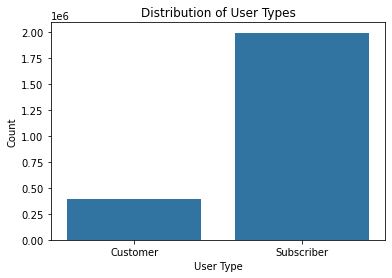

In [71]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='user_type', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Types');

In [72]:
df['start_month_char'].astype('object')

0          Dec
1          Dec
2          Dec
3          Dec
4          Dec
          ... 
2383416    Dec
2383417    Dec
2383418    Dec
2383419    Dec
2383420    Dec
Name: start_month_char, Length: 2383421, dtype: object

' Day of the week ' Trend of Sharing

In [73]:
df.groupby('start_weekday_char').agg({'bike_id':'count'})

,bike_id
start_weekday_char,
Fri,371555
Mon,375983
Sat,226488
Sun,198705
Thu,399367
Tue,407197
Wed,404126


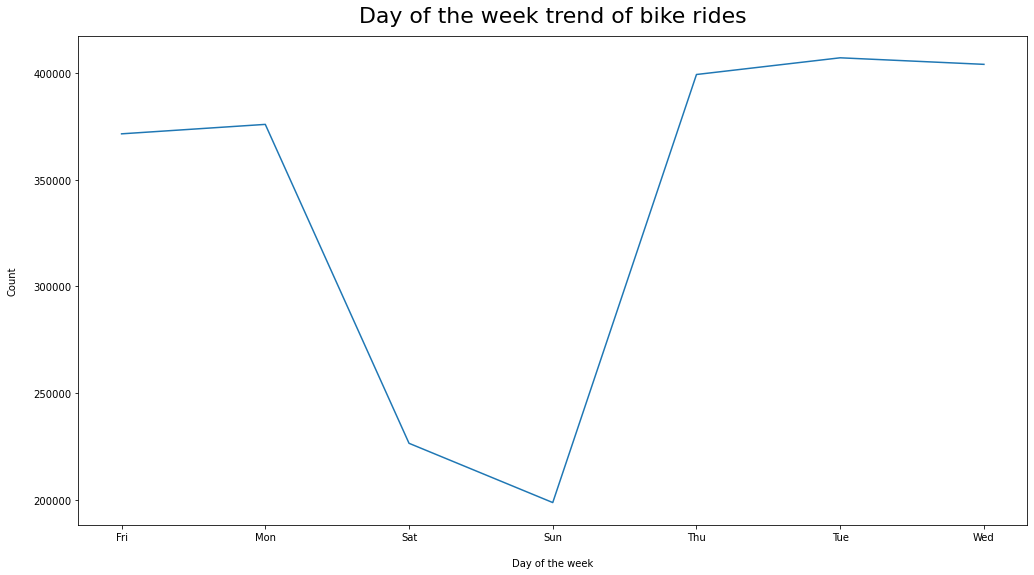

In [74]:
df.groupby('start_weekday_char').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.title('Day of the week trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('Day of the week', labelpad=16)
plt.ylabel('Count', labelpad=16);

On weekends, there is a drastic fall which is unsurprising since people mostly have a holiday from work

'Period of the Day' Trend of Sharing

In [75]:
df.groupby('period_of_day').agg({'bike_id':'count'})

,bike_id
period_of_day,
afternoon,930553
morning,900225
night,552643


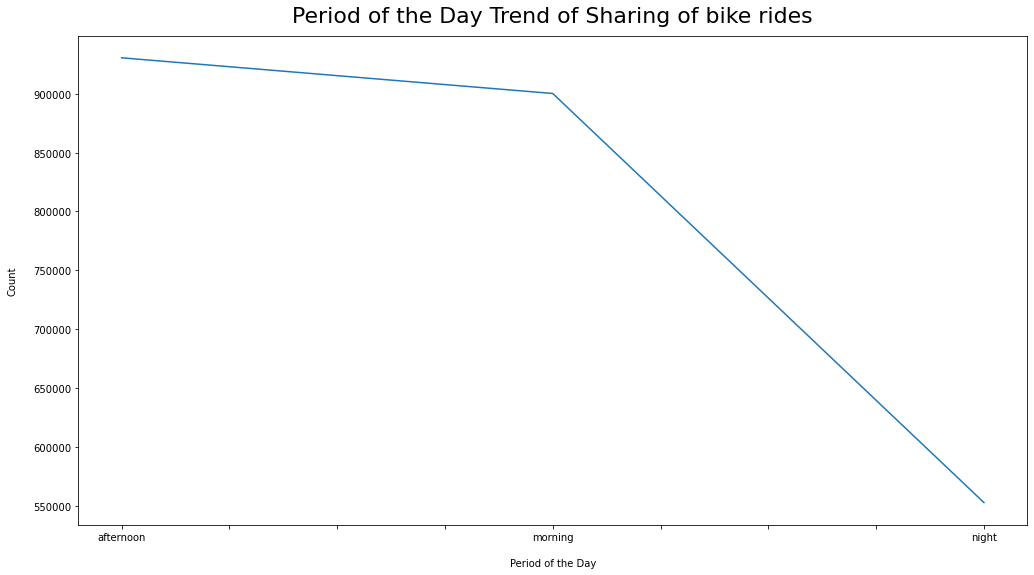

In [76]:
df.groupby('period_of_day').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.title('Period of the Day Trend of Sharing of bike rides', fontsize=22, y=1.015)
plt.xlabel('Period of the Day', labelpad=16)
plt.ylabel('Count', labelpad=16);

On afternoons, people start the most followed by on mornings and then only a fraction of people use it during the nights

Distribution by Month

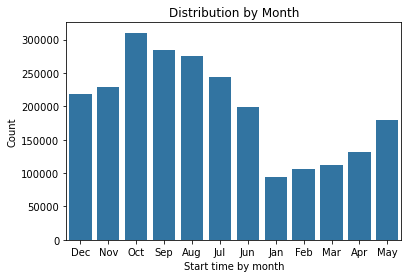

In [77]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_month_char', color=base_color) #order = df['start_month_char'].value_counts().index)
plt.xlabel('Start time by month')
plt.ylabel('Count')
plt.title('Distribution by Month');

A more logical way would be to arrange the above graph in the order of month 

In [78]:
ordinal_var_dict = {'start_month_char': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_of_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 object        
 4   start_station_id         float64       
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           float64       
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  int64         
 13  user_type                category      
 14  member_birth_year        float64       
 15  member_gender            object        
 16  bike_share_for_all_trip  object        
 17  start_time_month         in

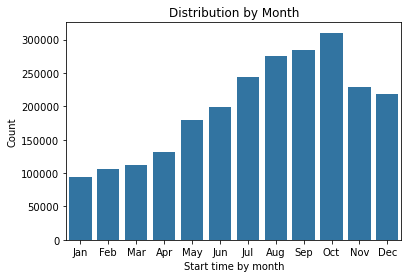

In [80]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_month_char', color=base_color) #order = df['start_month_char'].value_counts().index)
plt.xlabel('Start time by month')
plt.ylabel('Count')
plt.title('Distribution by Month');

Average ride duration during each month

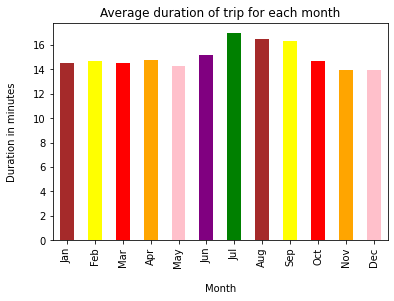

In [85]:
d=df.groupby('start_month_char').mean()['duration_sec']
d=d/60
colors=['brown', 'yellow', 'red', 'orange', 'pink', 'purple', 'green']
d.plot(kind='bar', color=colors);
plt.title("Average duration of trip for each month");
plt.xlabel("Month", labelpad=16)
plt.ylabel("Duration in minutes",labelpad=16);

Average ride duration during each day of the week

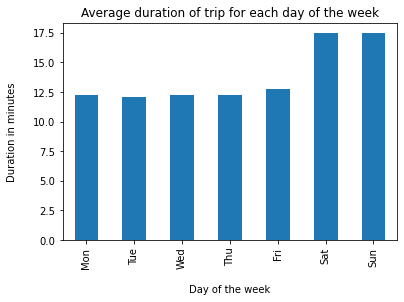

In [285]:
e=df.groupby('start_weekday_char').mean()['duration_sec']
e=e/60
e.plot(kind='bar');
plt.title("Average duration of trip for each day of the week");
plt.xlabel("Day of the week", labelpad=16)
plt.ylabel("Duration in minutes",labelpad=16);

There is not much to diffrentiate here, the average duration in minutes in almost months is same except for in fall (Jul, August, Sept) where the average duration increases and decreases towards the beginning of October

The duration trend of bike rides per user type

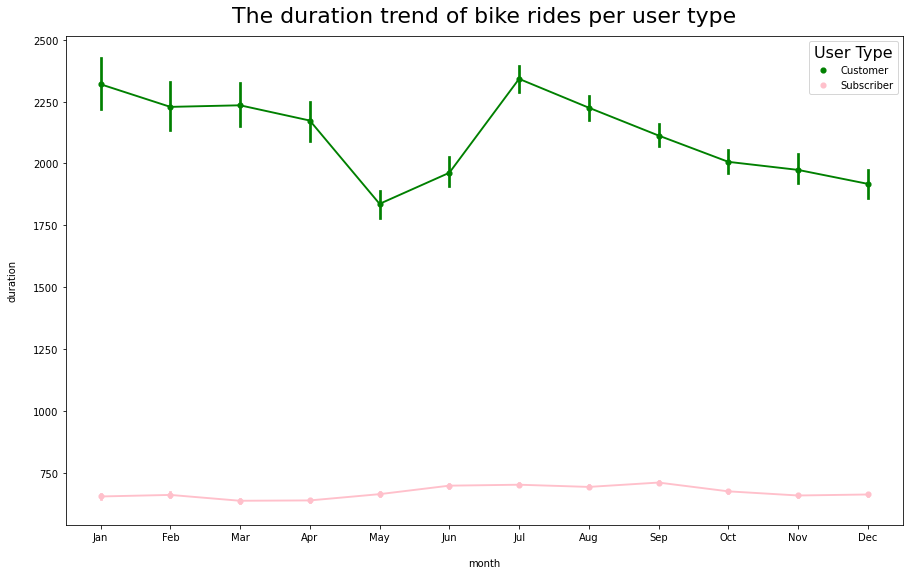

In [87]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'pink', 'Customer':'green'}
ax = sns.pointplot(x='start_month_char', y='duration_sec', hue='user_type', palette=my_palette, scale=.7, data=df)
plt.title('The duration trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('month', labelpad=16)
plt.ylabel('duration', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()


The duration for subscribers is way less in comparison to customers. Let us explore more on this later.

There is a steep decline in the duration of travel for customers from April to May. This can be probably accounted to the fact that it summer and people cannot ride a bike for so long. 

Interestingly, there is an increase in the average duration from April to May for Subscribers. This is logical since Subscribers as previously seen are huge in number and rent a bike only for shorter durations hence shorter distances. Hence, the impact of weather on such distances can be neglected and hence, the increase.   

Both customers and subscribers towards the end of the year seem to take a flat line shape 

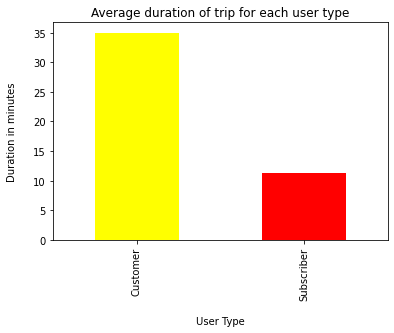

In [88]:
a=df.groupby('user_type').mean()['duration_sec']
a=a/60
colors=['yellow', 'red']
a.plot(kind='bar', color=colors);
plt.title("Average duration of trip for each user type");
plt.xlabel("User Type", labelpad=16)
plt.ylabel("Duration in minutes",labelpad=16);

The average duration for Customers is around 35 minutes while for subscriber it is around 12-13 minutes.

This is infact a great insight. The number of subscribers are almost four folds in number compared to the number of customers.

It clearly shows that bike sharing is the preferred means of transport for small distances or trips with low duration time

Observing traits at the top 10 starting location

In [89]:
top_10_stations=['San Francisco Ferry Building (Harry Bridges Plaza)',         
'The Embarcadero at Sansome St',                                
'San Francisco Caltrain (Townsend St at 4th St)',               
'San Francisco Caltrain Station 2  (Townsend St at 4th St)',    
'Market St at 10th St',                                         
'Montgomery St BART Station (Market St at 2nd St)',             
'Berry St at 4th St',                                           
'Powell St BART Station (Market St at 4th St)'                 
'Howard St at Beale St',                                        
'Steuart St at Market St']                                      

In [90]:
df_top_10=df[df['start_station_name'].isin(top_10_stations)]

In [91]:
df_top_10.reset_index()

,index,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_month_char,start_time_hour,period_of_day,start_weekday_num,start_weekday_char,age
0,5,5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.1660,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,...,NaN,NaN,NaN,12,Dec,22,night,6,Sun,NaN
1,12,12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.7430,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24.0,...,NaN,NaN,NaN,12,Dec,23,night,6,Sun,NaN
2,13,13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.9240,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24.0,...,NaN,NaN,NaN,12,Dec,23,night,6,Sun,NaN
3,21,21,4174,2017-12-31 22:52:22.286,2018-01-01 00:01:56.6140,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6.0,...,NaN,NaN,NaN,12,Dec,22,night,6,Sun,NaN
4,27,27,862,2017-12-31 23:38:24.874,2017-12-31 23:52:47.5420,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,...,NaN,NaN,NaN,12,Dec,23,night,6,Sun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370736,2383318,131260,743,2018-12-01 03:07:59.217,2018-12-01 03:20:22.8430,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,355.0,...,NaN,NaN,No,12,Dec,3,morning,5,Sat,NaN
370737,2383348,131290,293,2018-12-01 01:46:07.285,2018-12-01 01:51:00.9110,58.0,Market St at 10th St,37.776619,-122.417385,61.0,...,NaN,NaN,No,12,Dec,1,morning,5,Sat,NaN
370738,2383350,131292,218,2018-12-01 01:46:40.875,2018-12-01 01:50:19.7780,58.0,Market St at 10th St,37.776619,-122.417385,61.0,...,NaN,NaN,No,12,Dec,1,morning,5,Sat,NaN
370739,2383388,131330,182,2018-12-01 00:52:29.077,2018-12-01 00:55:32.0660,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,22.0,...,NaN,NaN,No,12,Dec,0,morning,5,Sat,NaN


In [92]:
df_top_10.groupby('start_station_name').agg({'bike_id':'count'})

,bike_id
start_station_name,
Berry St at 4th St,44672
Market St at 10th St,46878
Montgomery St BART Station (Market St at 2nd St),43465
San Francisco Caltrain (Townsend St at 4th St),47638
San Francisco Caltrain Station 2 (Townsend St at 4th St),49672
San Francisco Ferry Building (Harry Bridges Plaza),53648
Steuart St at Market St,37714
The Embarcadero at Sansome St,47054


Type of customers at top 10 stations

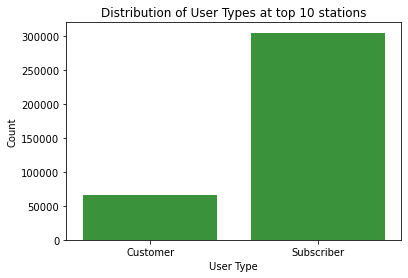

In [93]:
base_color = sns.color_palette()[2]
sns.countplot(data=df_top_10, x='user_type', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Types at top 10 stations');

The number of subscribers are far more (almost 6 folds) in comparison to number of customers

Assessing Traffic according to each month

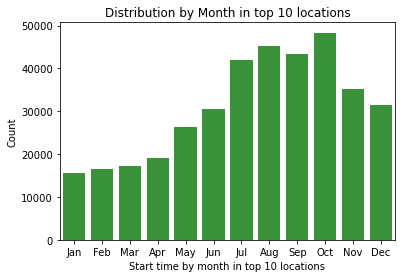

In [94]:
base_color = sns.color_palette()[2]
sns.countplot(data=df_top_10, x='start_month_char', color=base_color) 
plt.xlabel('Start time by month in top 10 locations')
plt.ylabel('Count')
plt.title('Distribution by Month in top 10 locations');

Most traffic was seen in the months of fall (July, August, September and October) indicating that fall is a very good season for business

Let us see the graphs for individual stations

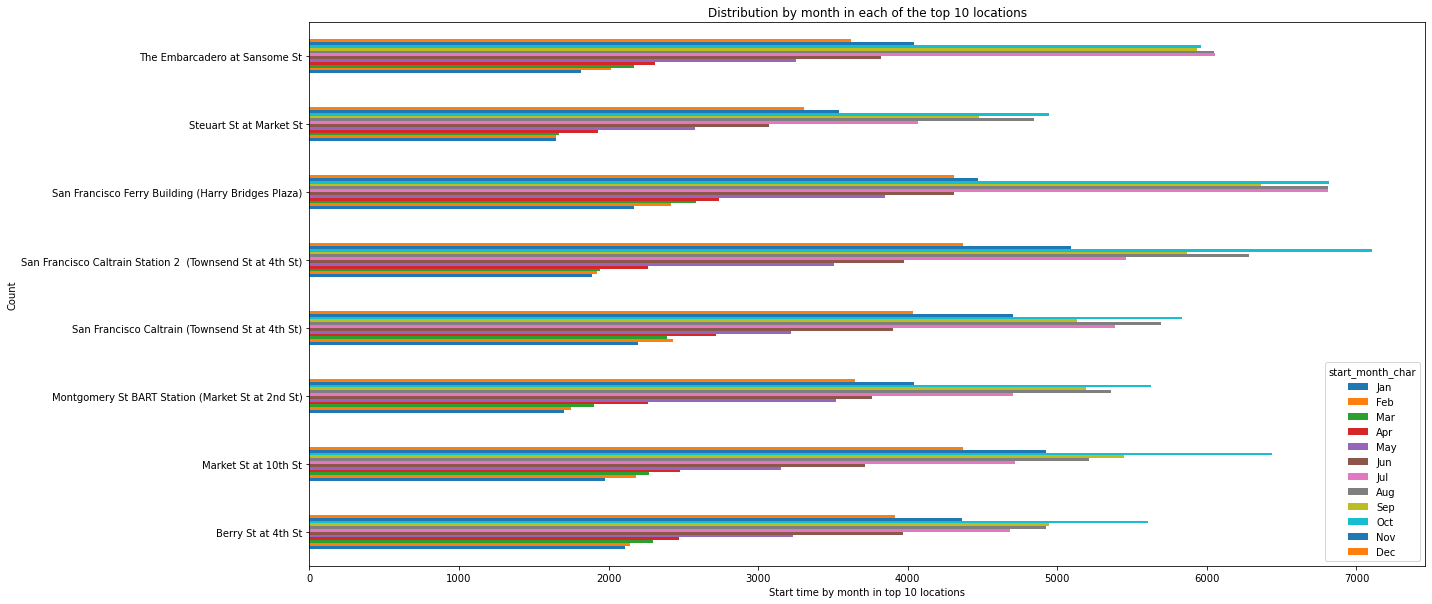

In [95]:
df_top_10.groupby(['start_month_char','start_station_name']).count()['bike_id'].unstack(0).plot(kind="barh",figsize=(20,10));
plt.xlabel('Start time by month in top 10 locations')
plt.ylabel('Count')
plt.title('Distribution by month in each of the top 10 locations');

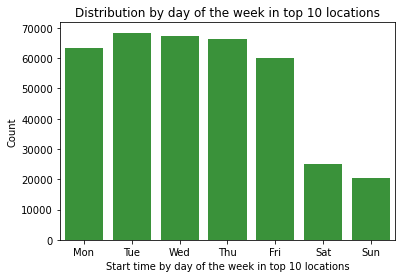

In [96]:
base_color = sns.color_palette()[2]
sns.countplot(data=df_top_10, x='start_weekday_char', color=base_color) 
plt.xlabel('Start time by day of the week in top 10 locations')
plt.ylabel('Count')
plt.title('Distribution by day of the week in top 10 locations');

Even at the top stations, on weekends there is a drastic drop in bike rides

Lets look at each station individually for more info 

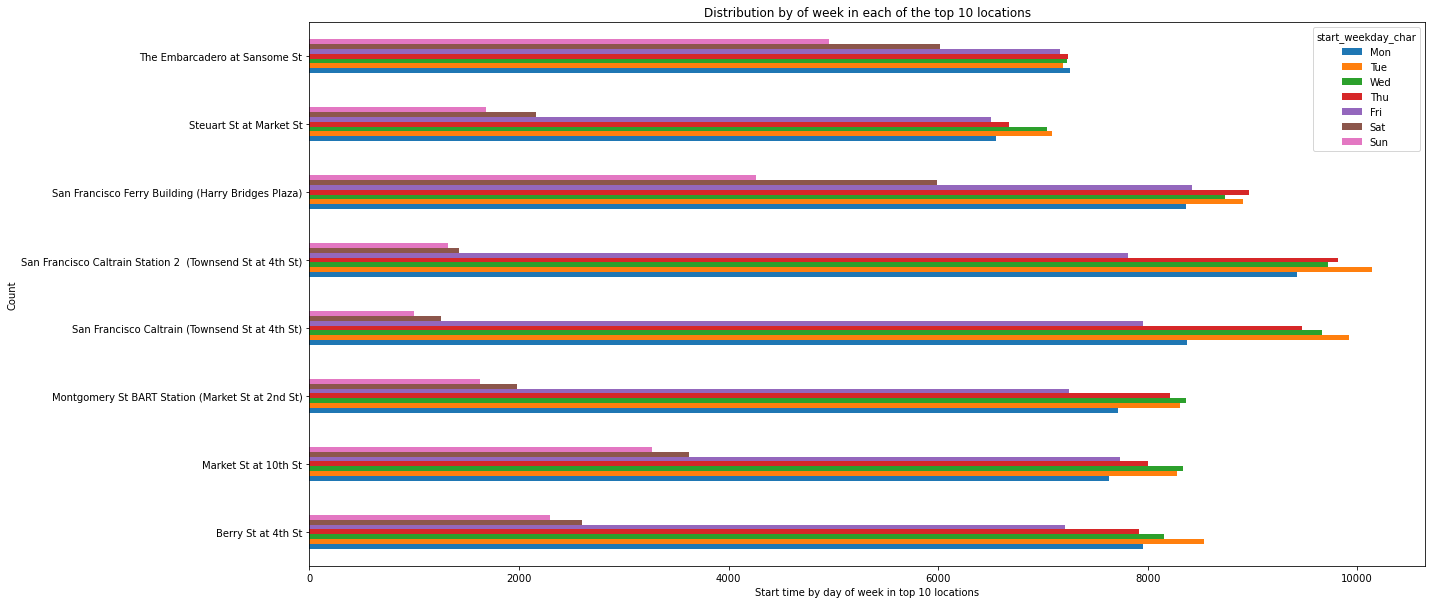

In [97]:
df_top_10.groupby(['start_weekday_char','start_station_name']).count()['bike_id'].unstack(0).plot(kind="barh",figsize=(20,10));
plt.xlabel('Start time by day of week in top 10 locations')
plt.ylabel('Count')
plt.title('Distribution by of week in each of the top 10 locations');

Yes, as seen above it is clear for each and every station that on weekends the count reduces

Also, Tuesday, Wednesday and Thursday can be seen as the days for best business at the top 10 stations

Duration of day

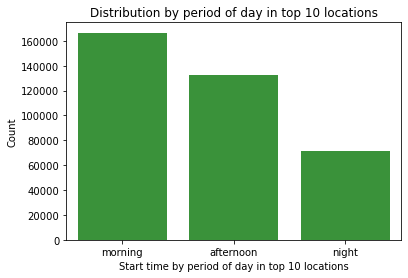

In [98]:
base_color = sns.color_palette()[2]
sns.countplot(data=df_top_10, x='period_of_day', color=base_color) 
plt.xlabel('Start time by period of day in top 10 locations')
plt.ylabel('Count')
plt.title('Distribution by period of day in top 10 locations');

As previously seen, there was not much difference in the count for Mornings and Afternoons in overall dataframe (All stations). Infact, people used to hire more during the afternoons, although only sloghtly more.

But, there is a clear difference when considering only the top 10 stations. 
People ride more or start there rides more during mornings than during any other period of the day in the top 10 stations

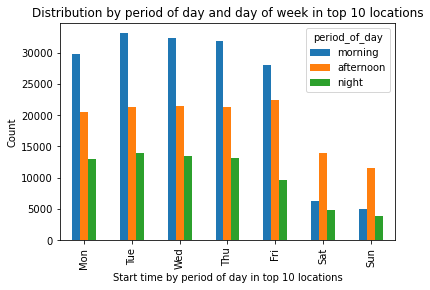

In [100]:
df_top_10.groupby(['period_of_day', 'start_weekday_char']).count()['bike_id'].unstack(0).plot.bar();
plt.xlabel('Start time by period of day in top 10 locations')
plt.ylabel('Count')
plt.title('Distribution by period of day and day of week in top 10 locations');

Yes, the point above is proved. 

I mentioned above that the top 10 stations, contrastingly have more people starting their rides in mornings than afternoons.
The above graph does well in reiterating this fact. Clearly there is a huge demand in mornings during weekdays. On weekends, afternoons have a higher demand than mornings but there is not enough demand on weekends to counter the increase during weekdays 

Also,

It is a very interesting graph since there are two trends one for weekday and one for weekend. The interesting part is that the trends hold true for each weekday and each weekend

On weekdays, the count for morning is higher followed by afternoon and then night.

While on weekends, the count is highest in the afternoon. 

Distribution of duration

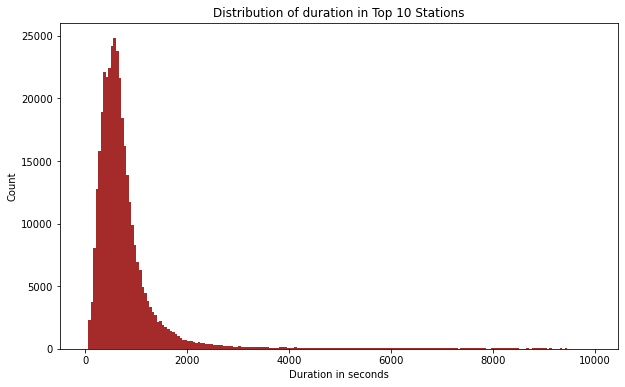

In [102]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)
plt.hist(data=df_top_10, x='duration_sec', bins=bins, color='brown')
plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.title('Distribution of duration in Top 10 Stations');

Duration distribution by each station

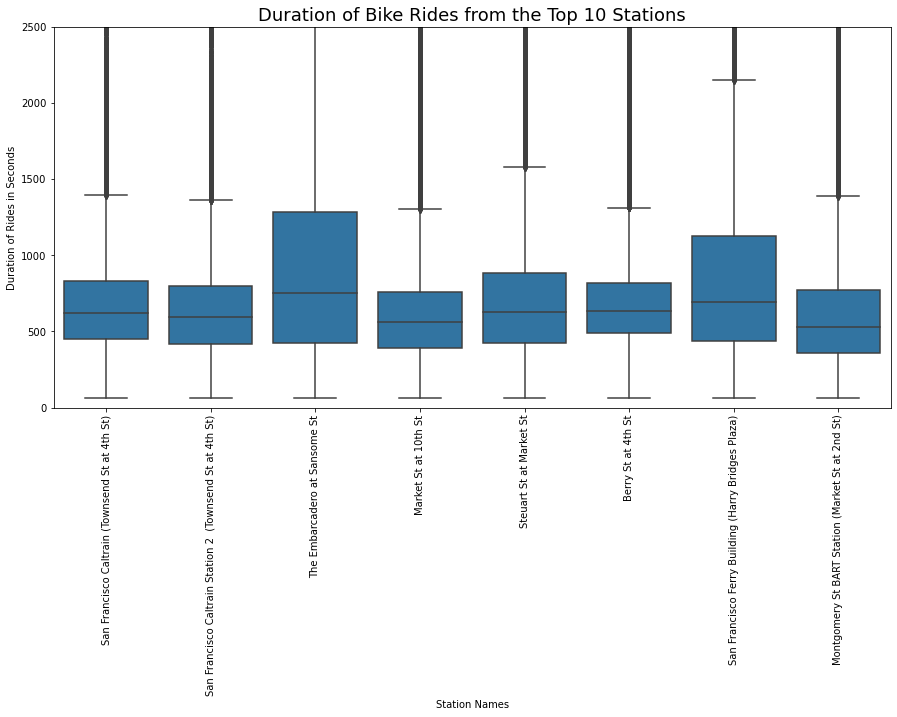

In [104]:
base_color = sns.color_palette()[0]
plt.figure(figsize = (15,7))
sns.boxplot(data = df_top_10, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 90);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from the Top 10 Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides in Seconds');

The median duration for each station is at around 600-700 seconds. 

There are a huge number of outliers after a duration of 1500 seconds

Distribution of Age

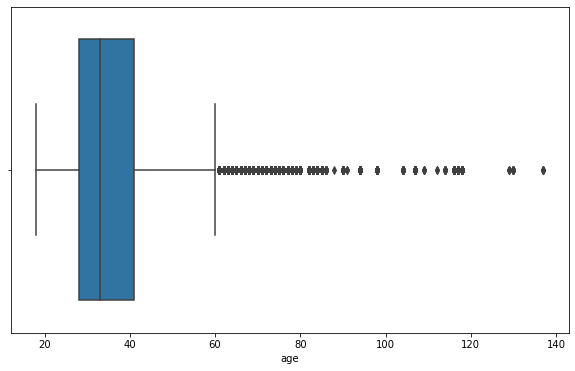

In [105]:
plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[0]

sns.boxplot(data=df, x='age', color=base_color);

The distribution of age shows that our users are between the ages of 18 to 60. 

The median age is around 30-35 

There are a lot of outliers after the age of 60 which can be dropped

In [110]:
df = df[df['age']<=60]

In [111]:
print(df['age'].mean())
print(df['age'].min())
print(df['age'].max())

34.455738760747984
18.0
60.0


The average age of our users is around 35 years. 

Our youngest user is 18 years old while the oldest is 60 years (Was 137 years before cleaning. The 137 year old surely has a body of metal. Just kidding. The data point is an outlier. )

Note: The 137 year data point could've been real but for our purpose, I have considered every point apbe age 60 as an outlier and hence have deleted it

In [113]:
df['member_age_bins'] = df['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [114]:
ordinal_var_dict = {'member_age_bins': ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [287]:
df.groupby(['user_type', 'member_gender']).count()['bike_id']/df.groupby('user_type').count()['bike_id']

user_type   member_gender
Customer    Female           0.324515
            Male             0.655374
            Other            0.020112
Subscriber  Female           0.244894
            Male             0.740393
            Other            0.014713
Name: bike_id, dtype: float64

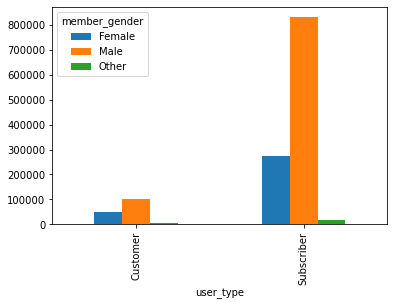

In [124]:
df.groupby(['user_type', 'member_gender']).count()['bike_id'].unstack().plot(kind='bar');

In [127]:
df.groupby('member_gender').size().reset_index(name='count')

,member_gender,count
0,Female,324804
1,Male,931874
2,Other,19608


In [128]:
df.groupby('member_gender').size().reset_index(name='count')['count']/len(df)*100

0    25.449155
1    73.014512
2     1.536333
Name: count, dtype: float64

Majority Users are Male 

The most popular locations for starting

In [81]:
start_most=df.groupby('start_station_name').count()['bike_id']
start_most_top_10=start_most.sort_values(ascending=False).head(10)
start_most_top_10

start_station_name
San Francisco Ferry Building (Harry Bridges Plaza)           53648
San Francisco Caltrain Station 2  (Townsend St at 4th St)    49672
San Francisco Caltrain (Townsend St at 4th St)               47638
The Embarcadero at Sansome St                                47054
Market St at 10th St                                         46878
Berry St at 4th St                                           44672
Montgomery St BART Station (Market St at 2nd St)             43465
Powell St BART Station (Market St at 4th St)                 41798
Steuart St at Market St                                      37714
Howard St at Beale St                                        36461
Name: bike_id, dtype: int64

In [82]:
end_most=df.groupby('end_station_name').count()['bike_id']
end_most_top_10=end_most.sort_values(ascending=False).head(10)
end_most_top_10

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    63658
San Francisco Ferry Building (Harry Bridges Plaza)           61222
San Francisco Caltrain (Townsend St at 4th St)               60348
The Embarcadero at Sansome St                                55753
Montgomery St BART Station (Market St at 2nd St)             49398
Market St at 10th St                                         45663
Powell St BART Station (Market St at 4th St)                 44150
Berry St at 4th St                                           43397
Steuart St at Market St                                      37913
Powell St BART Station (Market St at 5th St)                 34565
Name: bike_id, dtype: int64

Approximately, 1.5 percent people have not been identified. This 1.5 percent is from the 2017 data since data from that year had no columns for user characterssitics.

With those identified,

- 73 percent are Male

- 25 percent are Female

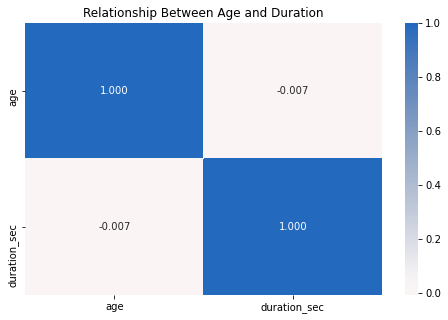

In [134]:
plt.figure(figsize = [8, 5])
sns.heatmap(df[['age', 'duration_sec']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

Age and Duration Correlation:

- Strength : Weak
- Direction : Negative
        

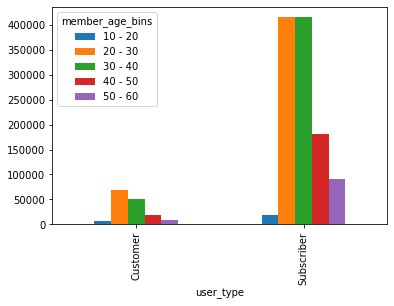

In [122]:
df.groupby(['user_type', 'member_age_bins']).count()['bike_id'].unstack().plot(kind='bar');

Our bulk of users lie in the ages 20-40.
For both, subscribers and Customers 

# Multiviarate analysis

In [168]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,start_time_month,start_month_char,start_time_hour,period_of_day,start_weekday_num,start_weekday_char,age,member_age_bins
519700,0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,...,Male,No,1,Jan,22,night,2,Wed,32.0,30 - 40
519702,2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,...,Male,No,1,Jan,14,afternoon,2,Wed,22.0,20 - 30
519704,4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,...,Male,No,1,Jan,19,night,2,Wed,27.0,20 - 30
519706,6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,...,Male,No,1,Jan,23,night,2,Wed,30.0,20 - 30
519707,7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,...,Male,No,1,Jan,23,night,2,Wed,38.0,30 - 40


### Customers Bike Trends by Age ,Weekdays, Hours

In [201]:
subs_df01_c = df[(df['age']>=20) & (df['age']<60) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Customer')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [203]:
subs_df01_c.head()

,start_weekday_char,start_time_hour,count
0,Mon,6,230
1,Mon,7,663
2,Mon,8,1442
3,Mon,9,1184
4,Mon,10,796


In [204]:
subs_df02_c = df[(df['age']>=20) & (df['age']<30) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Customer')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [205]:
subs_df03_c = df[(df['age']>=30) & (df['age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Customer')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [206]:
subs_df04_c = df[(df['age']>=40) & (df['age']<50) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Customer')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [207]:
subs_df02_c['start_weekday_char'] = pd.Categorical(subs_df02_c['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)


In [208]:
subs_df03_c['start_weekday_char'] = pd.Categorical(subs_df03_c['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [209]:
subs_df04_c['start_weekday_char'] = pd.Categorical(subs_df04_c['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [210]:
subs_df02_c['count_percentage'] = subs_df02_c['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [211]:
subs_df03_c['count_percentage'] = subs_df03_c['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [212]:
subs_df04_c['count_percentage'] = subs_df04_c['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [213]:
subs_df02_c['rank'] = subs_df02_c['count_percentage'].rank(ascending=False).astype(int)

In [214]:
subs_df03_c['rank'] = subs_df03_c['count_percentage'].rank(ascending=False).astype(int)

In [215]:
subs_df04_c['rank'] = subs_df04_c['count_percentage'].rank(ascending=False).astype(int)

In [216]:
subs_pivot02_c = subs_df02_c.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [217]:
subs_pivot03_c = subs_df03_c.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [218]:
subs_pivot04_c = subs_df04_c.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

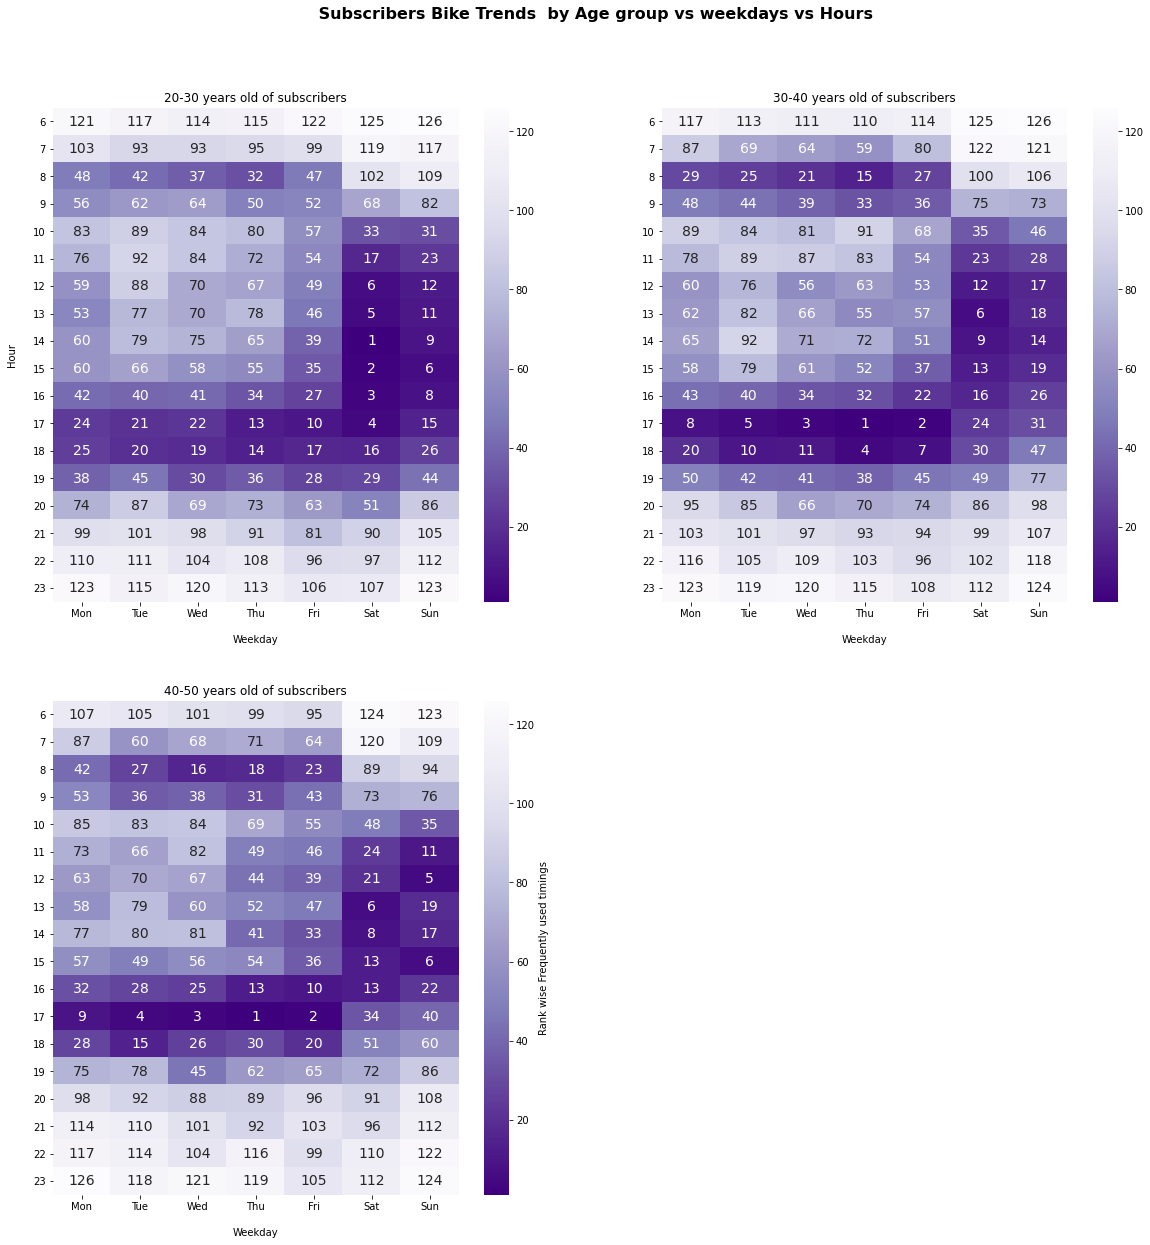

In [219]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Subscribers Bike Trends  by Age group vs weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(subs_pivot02_c, fmt='d', annot=True, cmap='Purples_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subs_pivot03_c, fmt='d', annot=True, cmap='Purples_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subs_pivot04_c, fmt='d', annot=True, cmap='Purples_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

Customers generally use bikes on Weekends. 

Their primary use is on Weekends for recreation purposes (probably) from around 10 am to  7 pm.

On Weekdays their use is most during 8 am to 9 am and 4pm to 6pm.

Interestingly there is no contrasting difference among different age groups. All age groups show similar traits which are mentioned above

### Subscribers Bike Trends by Age ,Weekdays, Hours Analysis

In [221]:
subs_df01 = df[(df['age']>=20) & (df['age']<60) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [222]:
subs_df01.head()

,start_weekday_char,start_time_hour,count
0,Mon,6,3985
1,Mon,7,11609
2,Mon,8,23897
3,Mon,9,17811
4,Mon,10,6728


In [223]:
subs_df02 = df[(df['age']>=20) & (df['age']<30) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [224]:
subs_df03 = df[(df['age']>=30) & (df['age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [225]:
subs_df04 = df[(df['age']>=40) & (df['age']<50) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [226]:
subs_df02['start_weekday_char'] = pd.Categorical(subs_df02['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)


In [227]:
subs_df03['start_weekday_char'] = pd.Categorical(subs_df03['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [228]:
subs_df04['start_weekday_char'] = pd.Categorical(subs_df04['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [229]:
subs_df02['count_percentage'] = subs_df02['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [230]:
subs_df03['count_percentage'] = subs_df03['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [231]:
subs_df04['count_percentage'] = subs_df04['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [232]:
subs_df02['rank'] = subs_df02['count_percentage'].rank(ascending=False).astype(int)

In [233]:
subs_df03['rank'] = subs_df03['count_percentage'].rank(ascending=False).astype(int)

In [234]:
subs_df04['rank'] = subs_df04['count_percentage'].rank(ascending=False).astype(int)

In [235]:
subs_pivot02 = subs_df02.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [236]:
subs_pivot03 = subs_df03.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [237]:
subs_pivot04 = subs_df04.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

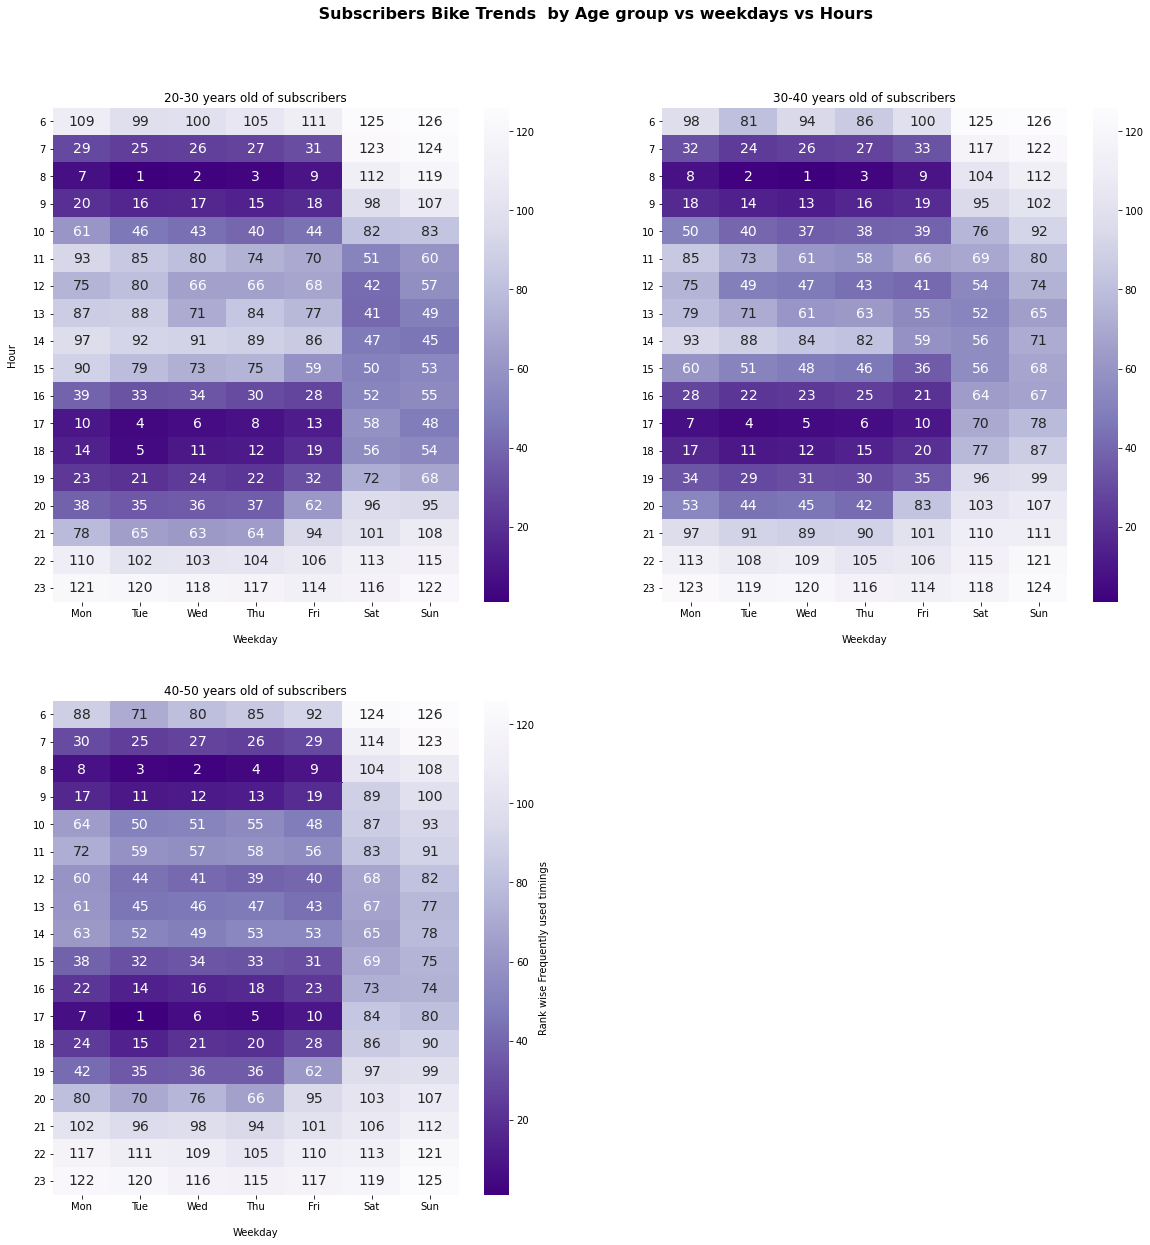

In [238]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Subscribers Bike Trends  by Age group vs weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(subs_pivot02, fmt='d', annot=True, cmap='Purples_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subs_pivot03, fmt='d', annot=True, cmap='Purples_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subs_pivot04, fmt='d', annot=True, cmap='Purples_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

Subscribers use bikes primarily during Weekdays as compared to Customers who use it during Weekends primarily.

The peak hours of usage during Weekdays is from 7 am to 9 am and from 4 pm to 6pm. There are hardly any Subscribers who use bikes during the weekends.

This can lead to an explanation that Subscribers primary use of bikes is to commute to and fro to their place of work

Even here, there is no contrasting difference between traits of different age groups

### Male Users Bike Trends by Age ,Weekdays, Hours

In [239]:
subs_df01_m = df[(df['age']>=20) & (df['age']<60) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Male')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [241]:
subs_df01_m.head()

,start_weekday_char,start_time_hour,count
0,Mon,6,3173
1,Mon,7,8601
2,Mon,8,17824
3,Mon,9,14222
4,Mon,10,5693


In [242]:
subs_df02_m = df[(df['age']>=20) & (df['age']<30) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Male')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [243]:
subs_df03_m = df[(df['age']>=30) & (df['age']<40) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Male')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [244]:
subs_df04_m = df[(df['age']>=40) & (df['age']<50) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Male')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [245]:
subs_df02_m['start_weekday_char'] = pd.Categorical(subs_df02_m['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)


In [246]:
subs_df03_m['start_weekday_char'] = pd.Categorical(subs_df03_m['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [247]:
subs_df04_m['start_weekday_char'] = pd.Categorical(subs_df04_m['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [248]:
subs_df02_m['count_percentage'] = subs_df02_m['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [249]:
subs_df03_m['count_percentage'] = subs_df03_m['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [250]:
subs_df04_m['count_percentage'] = subs_df04_m['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [251]:
subs_df02_m['rank'] = subs_df02_m['count_percentage'].rank(ascending=False).astype(int)

In [252]:
subs_df03_m['rank'] = subs_df03_m['count_percentage'].rank(ascending=False).astype(int)

In [253]:
subs_df04_m['rank'] = subs_df04_m['count_percentage'].rank(ascending=False).astype(int)

In [254]:
subs_pivot02_m = subs_df02_m.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [255]:
subs_pivot03_m = subs_df03_m.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [256]:
subs_pivot04_m = subs_df04_m.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

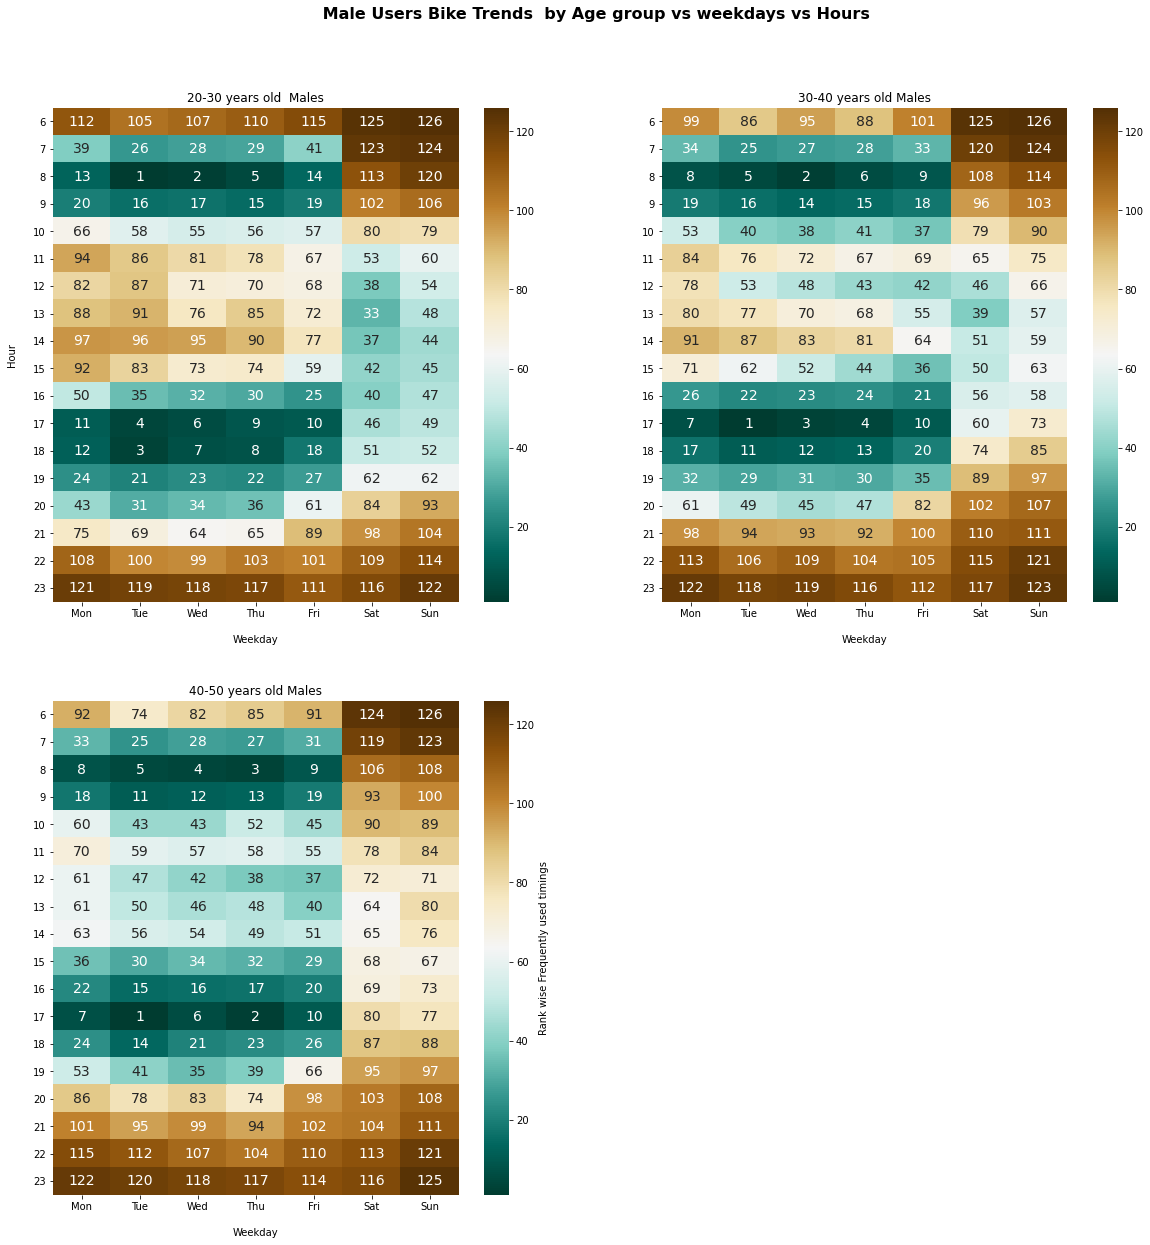

In [281]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Male Users Bike Trends  by Age group vs weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(subs_pivot02_m, fmt='d', annot=True, cmap='BrBG_r', annot_kws={"size": 14})
plt.title("20-30 years old  Males", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subs_pivot03_m, fmt='d', annot=True, cmap='BrBG_r', annot_kws={"size": 14})
plt.title("30-40 years old Males", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subs_pivot04_m, fmt='d', annot=True, cmap='BrBG_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old Males", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

All males primarily use bikes on Weekends. 

For 20-40 year old males:
- their primary use is on Weekdays from around 7 am to  9 am and 4pm to 7pm. 
- this is very similar to Customers as seen in previous analysis

For 40-50 year old males:
- On Weekdays their use is most during 7 am to 9 am and 3pm to 6pm.
- **There are hardly any 40-50 year old males who use bikes on weekends**


### Female Users Bike Trends by Age ,Weekdays, Hours

In [261]:
subs_df01_f = df[(df['age']>=20) & (df['age']<60) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Female')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [262]:
subs_df01_f.head()

,start_weekday_char,start_time_hour,count
0,Mon,6,1002
1,Mon,7,3537
2,Mon,8,7273
3,Mon,9,4475
4,Mon,10,1706


In [263]:
subs_df02_f = df[(df['age']>=20) & (df['age']<30) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Female')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [264]:
subs_df03_f = df[(df['age']>=30) & (df['age']<40) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Female')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [265]:
subs_df04_f = df[(df['age']>=40) & (df['age']<50) 
                              &(df['start_time_hour']>5)&(df['member_gender']=='Female')
                             ].groupby(['start_weekday_char', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [266]:
subs_df02_f['start_weekday_char'] = pd.Categorical(subs_df02_f['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)


In [267]:
subs_df03_f['start_weekday_char'] = pd.Categorical(subs_df03_f['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [268]:
subs_df04_f['start_weekday_char'] = pd.Categorical(subs_df04_f['start_weekday_char'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [269]:
subs_df02_f['count_percentage'] = subs_df02_f['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [270]:
subs_df03_f['count_percentage'] = subs_df03_f['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [271]:
subs_df04_f['count_percentage'] = subs_df04_f['count'].apply(lambda x: (x/subs_df01['count'].sum())*100)

In [272]:
subs_df02_f['rank'] = subs_df02_f['count_percentage'].rank(ascending=False).astype(int)

In [273]:
subs_df03_f['rank'] = subs_df03_f['count_percentage'].rank(ascending=False).astype(int)

In [274]:
subs_df04_f['rank'] = subs_df04_f['count_percentage'].rank(ascending=False).astype(int)

In [275]:
subs_pivot02_f = subs_df02_f.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [276]:
subs_pivot03_f = subs_df03_f.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

In [277]:
subs_pivot04_f = subs_df04_f.pivot_table(index='start_time_hour', columns='start_weekday_char', values='rank')

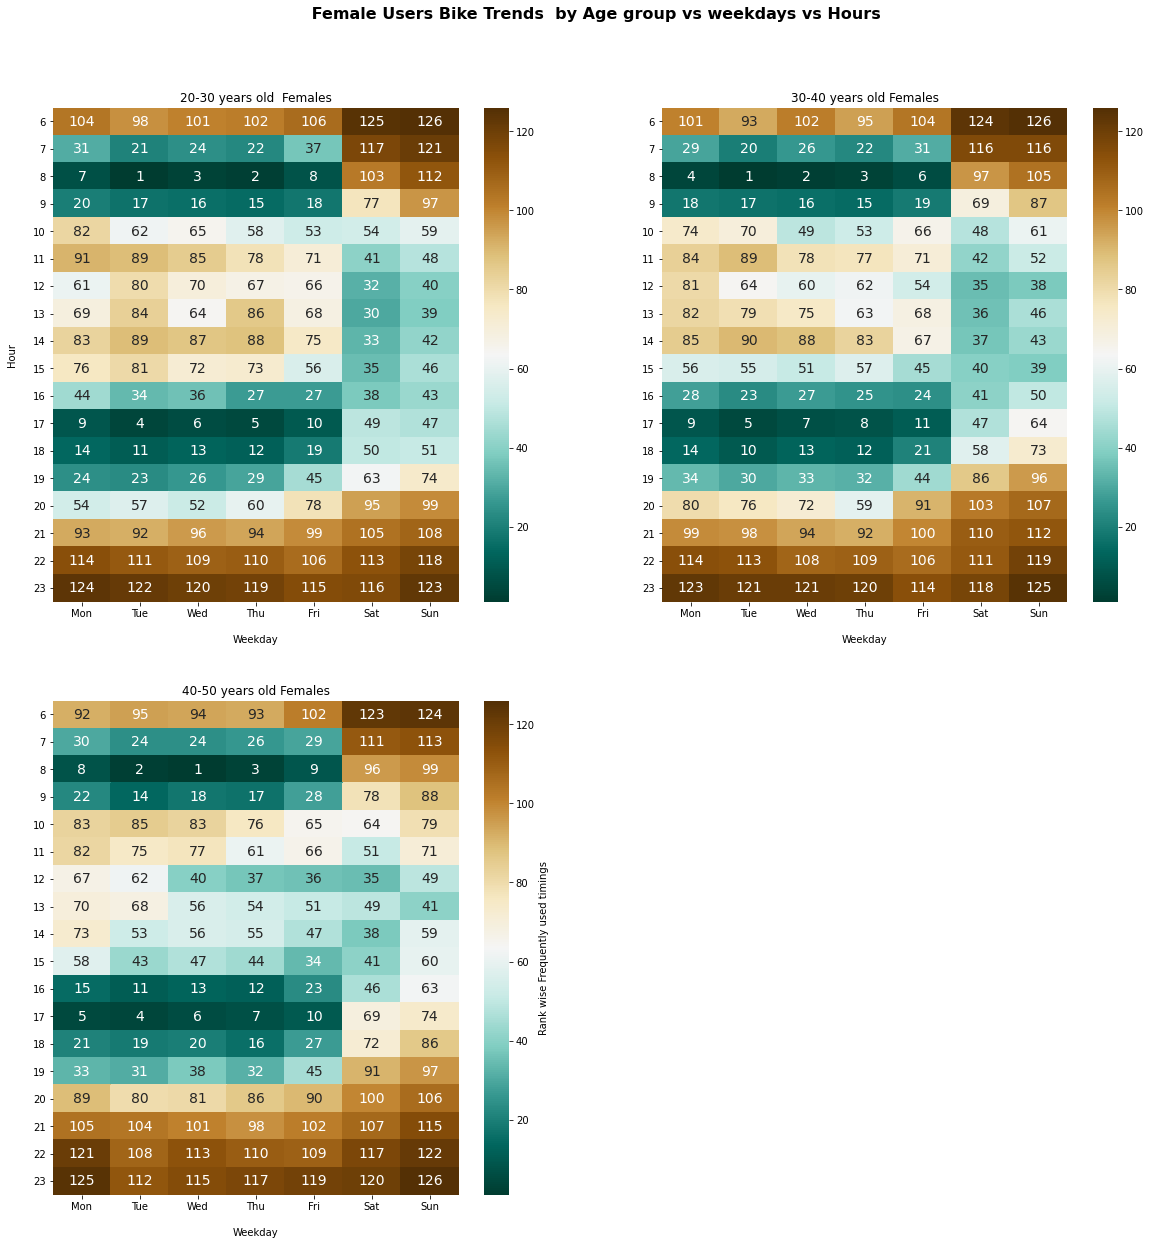

In [282]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Female Users Bike Trends  by Age group vs weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(subs_pivot02_f, fmt='d', annot=True, cmap='BrBG_r', annot_kws={"size": 14})
plt.title("20-30 years old  Females", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subs_pivot03_f, fmt='d', annot=True, cmap='BrBG_r', annot_kws={"size": 14})
plt.title("30-40 years old Females", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subs_pivot04_f, fmt='d', annot=True, cmap='BrBG_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old Females", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

All  females primarily use bikes on Weekends. But the thing to note here is that on weekends, females ride bikes more than males. 

For 20-40 year old females:
- their primary use is on Weekdays from around 7 am to 9 am and 4pm to 7pm. 
- this is very similar to Customers and Males as seen in previous analyses
- use on weekends is more than counterpart males

For 40-50 year old females:
- On Weekdays their use is most during 7 am to 9 am and 4pm to 7pm.
- **On Weekends their use is far more in comparison to counterpart males.**


# Conclusion

## Findings:

- There are 153842 Customers who make up approximately 16% of all users


- There are 1122444 Subscribers who make up approximately 84% of all users


- There are 324804 Females who make up 25% of all users.


- There are 931874 Males who make up 73.5% of all users.


- Out of the customers:
    - Female           32.45 %
    - Male             65.55 %
    - Other            2.00 %



- Out of the Subscribers
    - Female           24.48 %
    - Male             74.03 %
    - Other             1.47%


- Weekdays are far more popular for renting a bike than Weekends
    - Tuesday, Wednesday and Thursday are the days of the week during which most bikes are rented
    - Saturday and Sunday are the days of the week during which least bikes are rented


- Almost an equal number of bikes are rented during the mornings and afternoons while the number is almost halved during the night


- Fall months see the most bikes being rented (Jul, Aug, Sept,Oct) while spring sees the least (Jan, Feb, Mar)


- The 10 most popular stations are:
    - San Francisco Ferry Building (Harry Bridges Plaza)           
    - San Francisco Caltrain Station 2  (Townsend St at 4th St)    
    - San Francisco Caltrain (Townsend St at 4th St)               
    - The Embarcadero at Sansome St                                
    - Market St at 10th St                                         
    - Berry St at 4th St                                           
    - Montgomery St BART Station (Market St at 2nd St)             
    - Powell St BART Station (Market St at 4th St)                 
    - Steuart St at Market St                                      
    - Howard St at Beale St    


- For the 10 most popular stations:
    - Subscribers >> Customers as seen generally
    - Weekdays are far more popular for renting a bike than Weekends as seen generally
    - Afternoons are more popular for renting a bike than Mornings which is different to what is observed generally
    - On weekdays, the count for number of bikes rented in morning is higher followed by afternoon and then night.
    - On weekends, the count for number of bikes rented is highest in the afternoon
    - Median duration for each station is at around 600-700 seconds


- The average duration of trip for Customers (35 minutes) is far more than that for Subscribers (12-13 minutes)


- The average duration of trip for all months is approximately the same


- The average duration of trip is shorter on weekdays than on weekends 

## Interesting Insights:

- Even though almost an equal number of bikes are rented during mornings and afternoons, when this data is narrowed down to only the ten most popular stations, it is found that the number of rentals during the mornings are far more than the number of rentals during the afternoons. This indicate that in other stations, most bikes are rented during afternoons.


- Even though the number of trips on Weekdays are far greater than on Weekends, the average duration for Weekdays is more.


- There is a steep decline in the duration of travel for customers from April to May. This can be probably accounted to the fact that it summer and people cannot ride a bike for so long. Interestingly, there is an increase in the average duration from April to May for Subscribers. This makes logical sense since Subscribers as previously seen are huge in number and rent a bike only for shorter durations hence shorter distances. Hence, the impact of weather on such distances can be neglected and hence, the increase.   


## Analyses Output:

- **Customers V/s Subscribers Bike Trends by Age ,Weekdays, Hours**
    
    
    - Customers generally use bikes on Weekends. 
   
   
   - Their primary use is on Weekends for recreation purposes (probably) from around 10 am to 7 pm.
   
   
   - On Weekdays their use is most during 8 am to 9 am and 4pm to 6pm.
   
   
   - Interestingly there is no contrasting difference among different age groups. All age groups show similar traits which are mentioned above
   
   
   - Subscribers use bikes primarily during Weekdays as compared to Customers who use it during Weekends primarily.
   
   
   - The peak hours of usage during Weekdays is from 7 am to 9 am and from 4 pm to 6pm. There are hardly any Subscribers who use bikes during the weekends.
   
   
   - This can lead to an explanation that Subscribers primary use of bikes is to commute to and fro to their place of work
   
   
   - Even here, there is no contrasting difference between traits of different age groups
    


- **Males V/s Females  Bike Trends by Age ,Weekdays, Hours**
    
    
- All males primarily use bikes on Weekends. 
    
    
    - For 20-40 year old males:
        - Primary use is on Weekdays from around 7 am to 9 am and 4pm to 7pm. 
        - This is very similar to Customers as seen in previous analysis
    
    
    - For 40-50 year old males:
        - On Weekdays their use is most during 7 am to 9 am and 3pm to 6pm.
        - There are hardly any 40-50 year old males who rent bikes on weekends
    
    
- All  females primarily use bikes on Weekends. But the thing to note here is that on weekends, females ride bikes more than males. 
    
    
    - For 20-40 year old females:
        - Their primary use is on Weekdays from around 7 am to 9 am and 4pm to 7pm. 
        - This is very similar to Customers and Males as seen in previous analyses
        - Use on weekends is more than counterpart males
    
    
    - For 40-50 year old females:
        - On Weekdays their use is most during 7 am to 9 am and 4pm to 7pm.
        - On Weekends their use is far more in comparison to counterpart males.